In [74]:
# konlpy 패키지 설치
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
# 필요한 패키지들을 임포트
import pandas as pd
from konlpy.tag import Okt # konlpy.tag 모듈에서 Okt 클래스를 임포트합니다. 그리고 Okt 클래스의 인스턴스를 okt로 생성
okt = Okt()

In [92]:
reviews_df = pd.read_csv('https://raw.githubusercontent.com/leejin-kyu/logistic_sentiment/main/dataset.csv',encoding='cp949')

In [93]:
reviews_df.head(5)

,Unnamed: 0,content,score,time
0,1,야놀자 믿고 가는거야~떠나보는거야~~^^,5,2017-04-29
1,2,좋아요,5,2019-05-21
2,3,감사합니다,5,2018-02-27
3,4,초초초쵸특가야놀쟈!,5,2018-08-03
4,5,굿,5,2016-07-09


In [94]:
len(reviews_df)

5999

In [96]:
reviews_df = reviews_df.drop('Unnamed: 0', axis=1)
# 'Unnamed: 0' 열을 제거하기 위해 drop 함수를 사용함. axis=1은 열 방향을 의미함.

reviews_df.head(10)
# 변경된 데이터프레임의 처음 10개 행을 출력함.

,content,score,time
0,야놀자 믿고 가는거야~떠나보는거야~~^^,5,2017-04-29
1,좋아요,5,2019-05-21
2,감사합니다,5,2018-02-27
3,초초초쵸특가야놀쟈!,5,2018-08-03
4,굿,5,2016-07-09
5,테마샾에 이런 앱 광고해서 깔라고 하는거 고쳐주엇음 하네요 예쁜 테마 까려다가 이런...,1,2017-07-16
6,빠른 예약 및 결재도 간편해서 좋아요.,5,2017-05-07
7,좋아요,5,2019-10-24
8,중요한순간잘이용했습니다.,5,2018-08-20
9,좋아요,5,2019-11-29


In [84]:
def tokenizer(text):
    morph = okt.pos(text)  # 텍스트를 형태소로 분석하여 품사 정보를 추출하고, morph에 저장
    words = []  # 형태소 분석 결과가 저장될 리스트 변수
    for word, tag in morph:  # 각 형태소와 해당 형태소의 품사 정보에 대해 반복
        if tag in ['Noun', 'Adjective', 'Adverb', 'Verb']:  # 품사가 '형용사'인 경우 선택
            if len(word) > 1:  # 단어 길이가 1보다 큰 경우에만 선택
                words.append(word)  # 선택된 형용사를 words 리스트에 추가
    return words

In [82]:
text='나는 어제 학교에 갔다'

In [83]:
okt.pos(text)

[('나', 'Noun'),
 ('는', 'Josa'),
 ('어제', 'Noun'),
 ('학교', 'Noun'),
 ('에', 'Josa'),
 ('갔다', 'Verb')]

In [85]:
reviews_df= reviews_df.astype('str') #astype은 자료형 변환 함수, 전처리에 용이하게 str로 변환

In [86]:
reviews_df['content'] = reviews_df['content'].apply(tokenizer) # data의 total 컬럼에 형태소 추출함수인 tokenizer함수를 적용함

In [87]:
reviews_df['content'] 

0                    [놀자, 믿고, 가는거야, 떠나, 보는거야]
1                                       [좋아요]
2                                     [감사합니다]
3                               [초초초, 쵸특가야놀쟈]
4                                          []
                        ...                  
5994                                    [편해요]
5995                 [편하고, 주변, 금방, 알수있어, 좋아요]
5996                                [사용, 편해요]
5997    [결제, 편하구요, 솔직한, 후기, 선택, 하는데, 도움, 됩니다]
5998                                  [편리합니다]
Name: content, Length: 5999, dtype: object

In [88]:
reviews_df= reviews_df.astype('str') #astype은 자료형 변환 함수, 전처리에 용이하게 str로 변환

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1, 1))  # CountVectorizer 객체 생성, 최대 5000개의 특성으로 설정, 단일 단어로 구성된 토큰만 고려

tdm = cv.fit_transform(reviews_df.content)  # 단어 문서 행렬(TDM) 생성, 'content' 열의 텍스트를 기반으로 행렬을 생성함
# cv.fit_transform() 안에 분석할 단어 문서 행렬을 넣어주면 됨. fit은 분석하고자 하는 데이터에 맞게 transform 변환을 하는데 DTM 방식으로 변환함.

word_count_tf = pd.DataFrame({'단어': cv.get_feature_names_out(), '빈도': tdm.sum(axis=0).flat})
# cv.get_feature_names_out()을 통해 추출된 단어 목록과 tdm.sum(axis=0).flat을 통해 단어별 빈도 합계를 계산하여 데이터프레임 생성

word_count_tf = word_count_tf.sort_values('빈도', ascending=False)  # 단어를 빈도를 기준으로 내림차순으로 정렬
word_count_tf = word_count_tf.reset_index(drop=True)  # 인덱스 초기화
word_count_tf.index = word_count_tf.index + 1  # 인덱스를 1부터 시작하도록 수정

word_count_tf.to_csv('빈도.csv', encoding='cp949')  # '빈도.csv'라는 이름으로 데이터를 CSV 파일로 저장

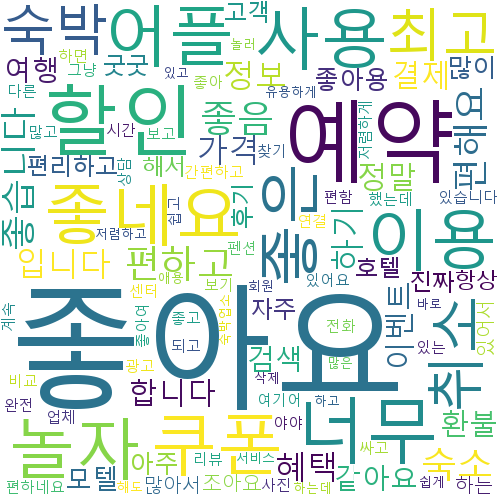

In [90]:
from wordcloud import WordCloud
import urllib.request

font_path = 'malgun.ttf'  # WordCloud에 사용할 폰트 파일 경로
font_url = 'https://github.com/leejin-kyu/logistic_sentiment/raw/main/malgun.ttf'  # 폰트 파일 다운로드를 위한 URL
urllib.request.urlretrieve(font_url, font_path)  # 폰트 파일을 다운로드하여 지정된 경로에 저장

wc = WordCloud(background_color='white', max_words=100, width=500, height=500, font_path=font_path)
# WordCloud 객체 생성, 배경색을 흰색으로 설정하고 최대 100개의 단어를 포함하도록 설정, 크기는 500x500으로 지정, 폰트 경로를 설정

count_dic = dict(zip(word_count_tf['단어'], word_count_tf['빈도']))
# 단어와 빈도로 이루어진 데이터프레임을 이용하여 단어와 해당 단어의 빈도를 사전 형태로 저장

cloud = wc.fit_words(count_dic)
# WordCloud 객체에 단어와 빈도 정보를 입력하여 WordCloud 생성

cloud.to_image()
# 생성된 WordCloud 이미지를 출력